In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

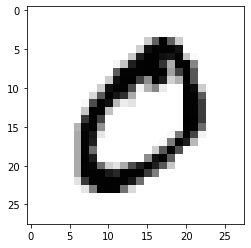

In [2]:
# 读文件
first = plt.imread('../../day17/data/data/0/0_1.bmp')
plt.imshow(first, cmap='gray')

In [3]:
first

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 204,  96,   2,  96, 205, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 207,  17,   3,   3,   3,  18, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [4]:
data = []
target = []
for i in range(0,10):
    for j in range(1, 501):
        digit = plt.imread(f'../../day17/data/data/{i}/{i}_{j}.bmp')
        data.append(digit)
        target.append(i)


In [5]:
len(data)

5000

In [7]:
data = np.array(data).reshape(5000, -1)
data.shape

(5000, 784)

In [8]:
target = np.array(target)
target.shape

(5000,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [11]:
X_train.shape

(4000, 784)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_ = knn.predict(X_test)

In [15]:
y_[:100]

array([3, 9, 2, 7, 6, 5, 1, 3, 8, 5, 7, 9, 7, 1, 8, 2, 4, 4, 4, 2, 8, 1,
       1, 4, 6, 1, 1, 1, 1, 7, 8, 3, 6, 0, 6, 2, 5, 7, 4, 9, 3, 7, 4, 2,
       9, 0, 8, 4, 9, 9, 0, 8, 5, 2, 0, 7, 2, 7, 8, 7, 9, 6, 0, 9, 7, 4,
       8, 1, 5, 5, 9, 9, 3, 3, 0, 9, 4, 4, 8, 2, 1, 3, 2, 1, 6, 0, 0, 1,
       9, 8, 4, 8, 9, 7, 0, 8, 1, 5, 0, 0])

In [16]:
X_test.shape

(1000, 784)

In [19]:
knn.score(X_train, y_train)

0.95625

In [20]:
knn.score(X_test,  y_test)

0.94

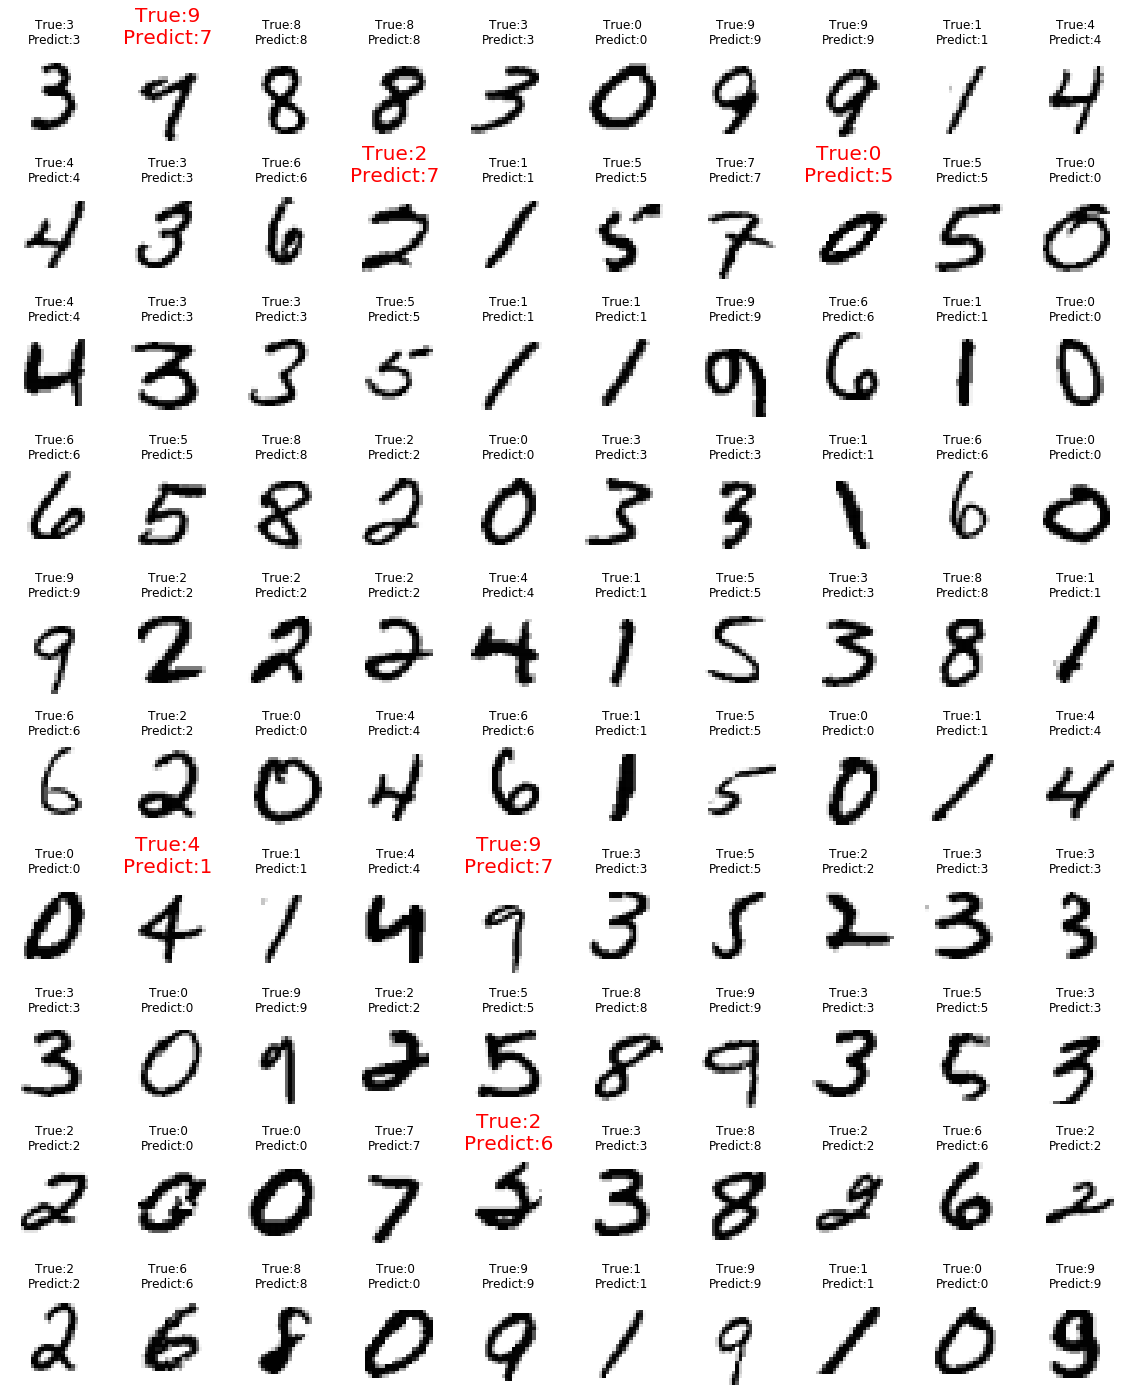

In [21]:
# 10 * 10 的样本展示
plt.figure(figsize=(10*2,10* 2.5))
for i in range(100):
    axes = plt.subplot(10,10,i+1)
    axes.imshow(X_test[i*10].reshape(28,28), cmap='gray')
    axes.axis('off')
    if y_test[i*10] != y_[i*10]:
        axes.set_title('True:%s\nPredict:%s' % (y_test[i*10], y_[i*10]), fontdict=dict(color='r', fontsize=20))
    else:
        axes.set_title('True:%s\nPredict:%s' % (y_test[i*10], y_[i*10]))